# Building a face recognition image that can detect and recognize images in a folder using face recognition library

## Import the library

In [18]:
import face_recognition
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

## Load and face encoding

In [16]:
known_images_folder = "images"

known_face_encodings = []
known_face_names = []

for filename in os.listdir(known_images_folder):
    image_path = os.path.join(known_images_folder, filename)
    image = face_recognition.load_image_file(image_path)
    face_encoding = face_recognition.face_encodings(image)[0]
    
    # Extract the name from the filename (assuming filenames are in the format "name.jpg")
    name = os.path.splitext(filename)[0]
    
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)


## Face recognition

In [19]:
# Now, you can use the known face encodings to recognize faces in unknown images
unknown_images_folder = "unknown images"

for filename in os.listdir(unknown_images_folder):
    image_path = os.path.join(unknown_images_folder, filename)
    unknown_image = face_recognition.load_image_file(image_path)
    unknown_face_encodings = face_recognition.face_encodings(unknown_image)
    
    for face_encoding in unknown_face_encodings:
        # Compare the face encoding with the known face encodings
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"  # Default name if no match is found
        
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
        
        print(f"Found {name} in {filename}")


Found lady2 in unknown_1.jpg
Found lady2 in unknown_2.jpg
Found lady1 in unknown_2.jpg
Found man in unknown_2.jpg
Found man in unknown_3.jpg
Found lady2 in unknown_4.jpg
Found lady1 in unknown_5.jpg
Found man in unknown_5.jpg
Found man in unknown_6.jpg
Found man in unknown_8.jpg


## Plot the images with face recognition results

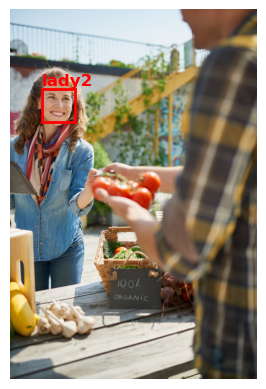

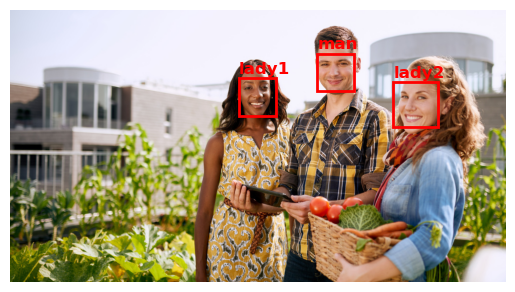

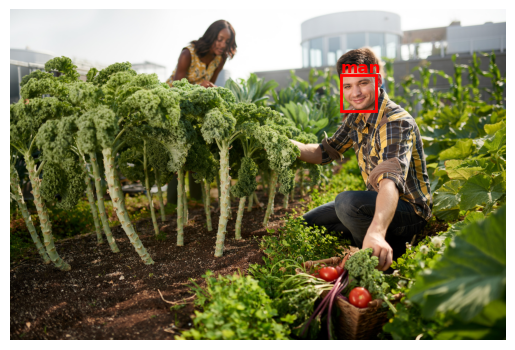

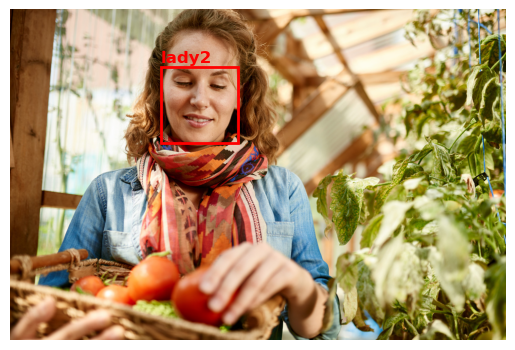

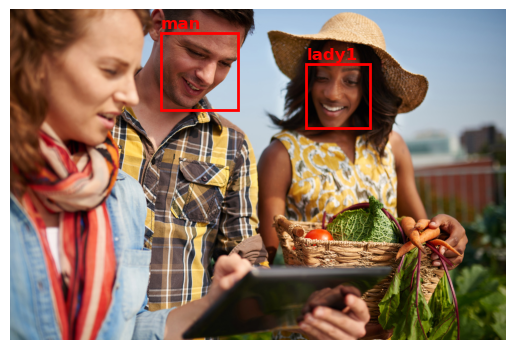

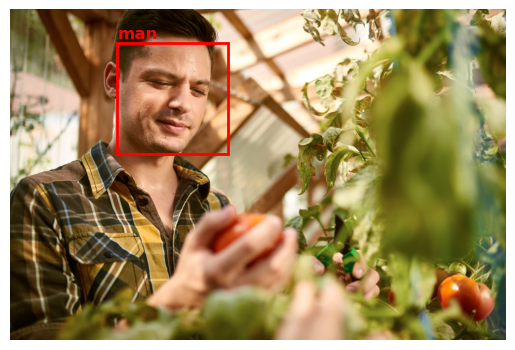

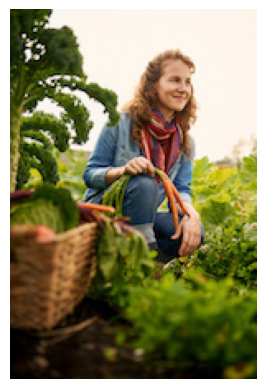

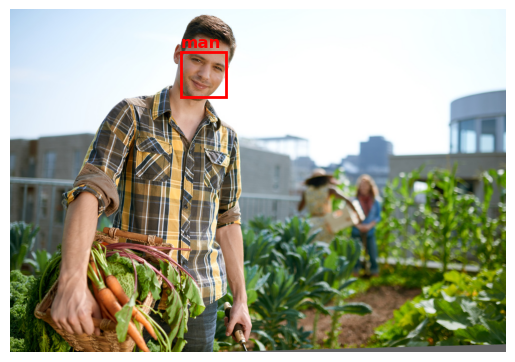

In [21]:
def plot_image_with_boxes(image_path, face_locations, names):
    image = face_recognition.load_image_file(image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(image)
    
    # Plot face rectangles and names
    for (top, right, bottom, left), name in zip(face_locations, names):
        rect = patches.Rectangle((left, top), right - left, bottom - top, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Display the name
        plt.text(left, top - 10, name, color='r', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

known_images_folder = "images"
unknown_images_folder = "unknown images"

for unknown_filename in os.listdir(unknown_images_folder):
    unknown_image_path = os.path.join(unknown_images_folder, unknown_filename)
    unknown_image = face_recognition.load_image_file(unknown_image_path)
    unknown_face_locations = face_recognition.face_locations(unknown_image)
    unknown_face_encodings = face_recognition.face_encodings(unknown_image, unknown_face_locations)

    names = []

    for unknown_face_encoding in unknown_face_encodings:
        # Compare the face encoding with the known face encodings
        matches = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
        name = "Unknown"  # Default name if no match is found

        if any(matches):
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]

        names.append(name)

    # Plot the image with face recognition results
    plot_image_with_boxes(unknown_image_path, unknown_face_locations, names)
